In [1]:
import sys
sys.path.insert(0,'../PLASIM/')
import Learn2_new as ln
ut = ln.ut # utilities
ef = ln.ef # ERA_Fields_New

# log to stdout
import logging
import os
logging.getLogger().level = logging.INFO
logging.getLogger().handlers = [logging.StreamHandler(sys.stdout)]

# set spacing of the indentation
ut.indentation_sep = '  '

In this environment you cannot import Basemap
Could not import sliding_window_view from np.lib.stride_tricks. Using custom copy for numpy<1.20
Could not load field_infos: using the hardcoded version


In [2]:
import importlib as imp
imp.reload(ln)
imp.reload(ef)

path_to_ERA = '/net/nfs/ssd2/gmiloshe/Climate-Learning'/ERA/
Could not import sliding_window_view from np.lib.stride_tricks. Using custom copy for numpy<1.20
Could not load field_infos: using the hardcoded version
Trying to import basemap
In this environment you cannot import Basemap
Trying to import cartopy
Successfully imported cartopy


<module 'ERA.ERA_Fields_New' from '/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/ERA_Fields_New.py'>

First valid path found in /net/nfs/ssd2/gmiloshe/Data/ERA/Data_ERA5/land_sea_mask.nc
ERA.lat.data.min() = -90.0, ERA.lat.data.max() = 90.0, ERA.lat.data[1] - ERA.lat.data[0] = -0.75,  len(ERA.lat.data) = 241,


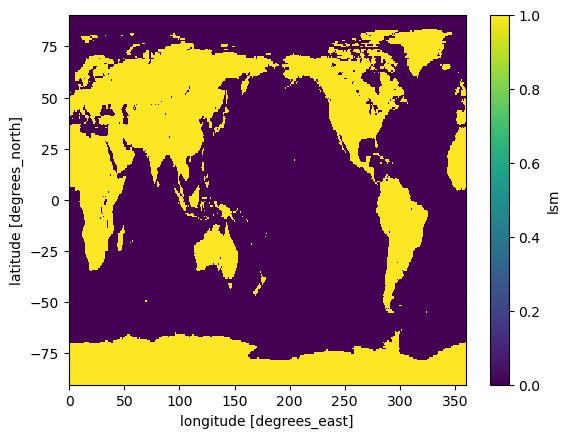

In [6]:
import matplotlib.pylab as plt
ERA = ef.get_lsm('/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/','ERA', discretize=True, lsmsource='Data_ERA5/Land-sea_mask.nc')
#plt.pcolormesh(CESM.data)
#plt.show()
ERA.plot()
print(f'{ERA.lat.data.min() = }, {ERA.lat.data.max() = }, {ERA.lat.data[1] - ERA.lat.data[0] = },  {len(ERA.lat.data) = },')

In [7]:
(ERA.lat.data.max()-ERA.lat.data.min())/(len(ERA.lat.data)-1), (ERA.lat.data.max()-ERA.lat.data.min())/(64)

(0.75, 2.8125)

First valid path found in /net/nfs/ssd2/gmiloshe/Data/ERA/Data_ERA5/Land-sea_mask.nc


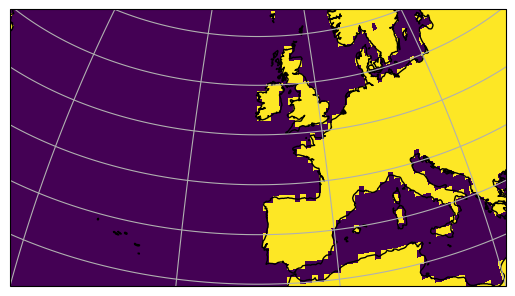

<xarray.DataArray 'lsm' (lat: 241, lon: 480)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 0.75 1.5 2.25 3.0 ... 357.0 357.8 358.5 359.2
  * lat      (lat) float32 90.0 89.25 88.5 87.75 ... -87.75 -88.5 -89.25 -90.0

In [9]:
import cartopy.crs as ccrs
import cartopy
ERA = ef.get_lsm('/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/','ERA', discretize=True, lsmsource='Data_ERA5/Land-sea_mask.nc')

central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')

ax.pcolormesh(ERA.lon.data, ERA.lat.data, ERA.data, transform=ccrs.PlateCarree())

plt.show()
ERA

In [10]:
import xarray as xr
ZG500 = xr.open_dataset('/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5/ERA5_zg500_2020.nc')
#TSA = xr.open_dataset('/homedata/gmiloshe/Climate-Learning/CESM/Data_CESM_short/North_Anomalies_TSA.nc')
ZG500

<xarray.Dataset>
Dimensions:    (time: 366, bnds: 2, longitude: 480, latitude: 241)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01T10:30:00 ... 2020-12-31T10:30:00
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    z          (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Sep 09 02:43:37 2021: cdo daymean download_zg500.nc ERA...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

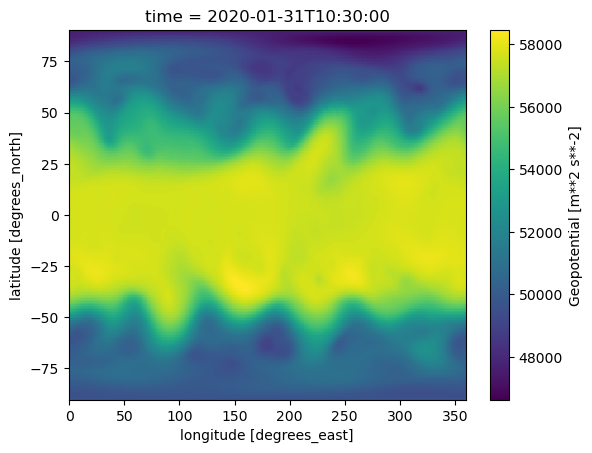

In [13]:
ZG500.z.isel(time=30).plot()

## Below xesmf regidding is used

It was complicated to install xesmf on usual conda environment used in the rest of the repo so a separate one can be used.

In [21]:
import xarray as xr
ZG500 = xr.open_dataset('/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5/ERA5_zg500_2020.nc')
ZG500

<xarray.Dataset>
Dimensions:    (time: 366, bnds: 2, longitude: 480, latitude: 241)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01T10:30:00 ... 2020-12-31T10:30:00
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    z          (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Sep 09 02:43:37 2021: cdo daymean download_zg500.nc ERA...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [16]:
import xarray as xr
import xesmf as xe

CONTROL_lsmask = xr.open_dataset('/homedata/gmiloshe/Climate-Learning/PLASIM/Data_Plasim_inter/CONTROL_lsmask.nc')


ds_out = xr.Dataset(
    {
        "lat": (["lat"], CONTROL_lsmask.lat.data),
        "lon": (["lon"], CONTROL_lsmask.lon.data),
    }
)

regridder = xe.Regridder(ZG500, ds_out, "bilinear")
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_241x480_64x128.nc 
Reuse pre-computed weights? False 
Input grid shape:           (241, 480) 
Output grid shape:          (64, 128) 
Periodic in longitude?      False

In [17]:
ZG500_out = regridder(ZG500)

In [19]:
ZG500.z.shape

(366, 241, 480)

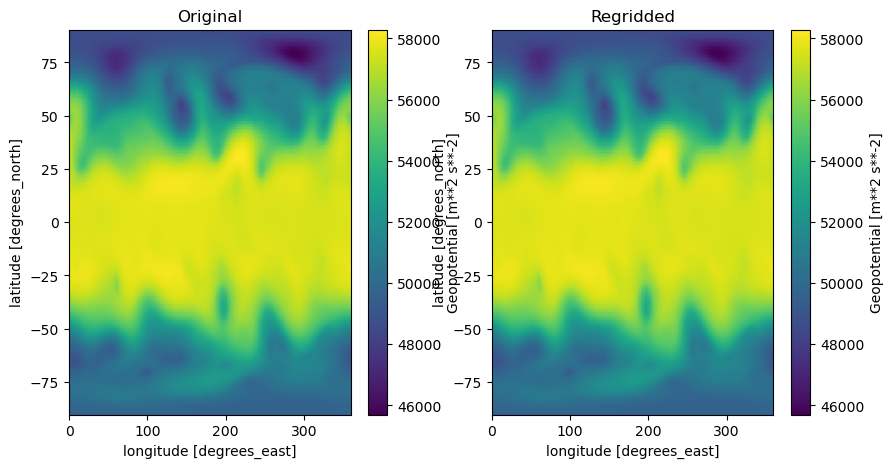

In [20]:
import matplotlib.pylab as plt
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# plot the original dataframe
ZG500.z.isel(time=0).plot(ax=axs[0])
axs[0].set_title('Original')

# plot the regridded dataframe
ZG500.z.isel(time=0).plot(ax=axs[1])
axs[1].set_title('Regridded')

plt.show()
